In [2]:
#Q1
x = input("Enter a whole number")
if float(x)%int(x) != 0:
    print("that's not a whole number")
else:
    x = int(x)
    print("the number: ", x, " in base 2: ", str(bin(x)))
    print("the number: ", x, " in base 8: ", str(oct(x)))
    print("the number: ", x, " in base 16: ", str(hex(x)))

Enter a whole number34
the number:  34  in base 2:  0b100010
the number:  34  in base 8:  0o42
the number:  34  in base 16:  0x22


In [3]:
#Q2
import pandas as pd
cast = pd.read_csv('C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [4]:
print((cast.title.values == 'Hamlet').sum())

#we search for all the rows where the value of the 'title' culomn is 'Hamlet'
#we sum all the times it happens


299


In [5]:
groups_by_title = cast.groupby('title')
treasure_island_movies = groups_by_title.get_group('Treasure Island')
by_year = treasure_island_movies.sort_values('year')
by_year.drop_duplicates(subset=['year'])


#we group all the rows by the name of the title of the movie
#after that we get all the rows from the 'treasure island' group
#we sort the rows by the value of the year each movie came out in



## the print shows the year of the movies in chronological order with one of the cast members because this is a cast df, not sure if this whats asked for.
##print(treasure_island_movies.groupby('year').size())

,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
1404517,Treasure Island,1920,Bull Montana,actor,Morgan,8.0
926924,Treasure Island,1934,Olin Howland,actor,Pirate of the Spanish Main,13.0
1979467,Treasure Island,1950,Basil Sydney,actor,Captain Smollett,3.0
961365,Treasure Island,1972,V?ctor Israel,actor,Morgan,14.0
1954811,Treasure Island,1973,Larry Storch,actor,Captain Smollett,5.0
1137587,Treasure Island,1985,Martin Landau,actor,The Captain,2.0
104905,Treasure Island,1999,Lance (II) Baker,actor,Frank,1.0


In [6]:
hamlet_movies = groups_by_title.get_group('Hamlet')
(hamlet_movies.year.values == 1921).sum()

#we use the groups_by_title var to get all the rows the their title column is 'Hamlet'
#then we sum all the rows that their year is 1921 from the 'Hamlet' rows 


9

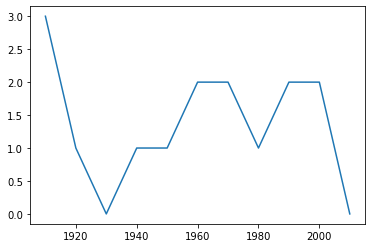

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
hamlet_movies_no_dups = hamlet_movies.drop_duplicates(subset=['year'])
decades = np.arange(1910,2020,10)
hamlet_years_releases = hamlet_movies_no_dups.year.values
amount_in_each_decade = np.zeros(11)
hamlet_decade_releases = (hamlet_years_releases//10)*10
for i in range(10):
    amount_in_each_decade[i] = np.count_nonzero(hamlet_decade_releases == decades[i])
plt.plot(decades,amount_in_each_decade)




#we create a series with no year duplictions and then we take the value of those years to an array.
#we int-divide each year by ten and then multiply it back to turn them into decades.
#after that we found the amount of times each decade is in the arraay and put it in the amount_in_each_decade array.


In [8]:
groups_by_year = cast.groupby('year')
for i in range(1950,1960):
    print(i,":")
    current_year = groups_by_year.get_group(i)    
    main_amount = (current_year.n.values == 1)
    male_amount = (current_year.type.values == 'actor')
    female_amount = (current_year.type.values == 'actress')
    actor_and_main = main_amount & male_amount
    actress_and_main = main_amount & female_amount
    print("leading roles for actors: ",np.sum(actor_and_main))
    print("leading roles for actresses: ",np.sum(actress_and_main))
    print()
    
    

#three bool masks for main roles,actors and actresses for each year
#to get the amount fo actors and actresses main roles you "and" the two masks

1950 :
leading roles for actors:  604
leading roles for actresses:  271

1951 :
leading roles for actors:  633
leading roles for actresses:  272

1952 :
leading roles for actors:  591
leading roles for actresses:  284

1953 :
leading roles for actors:  634
leading roles for actresses:  290

1954 :
leading roles for actors:  626
leading roles for actresses:  298

1955 :
leading roles for actors:  606
leading roles for actresses:  264

1956 :
leading roles for actors:  614
leading roles for actresses:  288

1957 :
leading roles for actors:  708
leading roles for actresses:  284

1958 :
leading roles for actors:  694
leading roles for actresses:  275

1959 :
leading roles for actors:  678
leading roles for actresses:  287



In [9]:
top_10 = np.zeros(10)
top_10_names = ["","","","","","","","","",""]
only_main_roles = cast.drop(cast[cast.n.values != 1].index)
main_after_90s = only_main_roles.drop(only_main_roles[only_main_roles.year.values < 1990].index)
groups_by_name = main_after_90s.groupby('name')
for name, group in groups_by_name:
    main_cnt = group.sum().n
    if main_cnt > top_10.min():
        i = np.where(top_10 == top_10.min())[0][0]
        top_10[i] = main_cnt
        top_10_names[i] = name
        
top_10_dict = {}
for i in range(10):
    top_10_dict[top_10_names[i]] = top_10[i]

    
top_10 = -np.sort(-top_10)
top_10_names_org =  ["","","","","","","","","",""]
top_10_to_del = np.copy(top_10)

for name in top_10_names:
    i = np.where(top_10_to_del == top_10_dict[name])
    top_10_names_org[i[0][0]] = name
    top_10_to_del[i[0][0]] = -1

    
for i in range(1,11):
    print(i,": " , top_10_names_org[i-1], "with ", top_10[i-1]," main roles.")
    
    
    
#we drop from the df all the cast members from movies before the 90s and all the side roles.
#we group whats left from the df by name.
#we go over each actor/actress and check how many main roles they had, if they had more than the person with the least main roles
#in the top 10 they switch with them.
#after that we sort the amount of main roles in a decending order and print it out.

1 :  Mohanlal with  126.0  main roles.
2 :  Mammootty with  118.0  main roles.
3 :  Akshay Kumar with  87.0  main roles.
4 :  Jayaram with  76.0  main roles.
5 :  Andy Lau with  72.0  main roles.
6 :  Ajay Devgn with  69.0  main roles.
7 :  Eric Roberts with  68.0  main roles.
8 :  Amitabh Bachchan with  68.0  main roles.
9 :  Nagarjuna Akkineni with  60.0  main roles.
10 :  Dilip with  59.0  main roles.


In [108]:
import collections
cast_by_year = cast.groupby('name')
a = cast_by_year.get_group('Frank Oz')
a = a.groupby('title')

dict1 = {}
for g in a:
    if len(g[1]) > 1:
        y = g[1]['year'].values[0]
        if y in dict1:
            dict1[y] += ',' + g[0]
        else: 
            dict1[y] = g[0]
        
ordered_dict = collections.OrderedDict(sorted(dict1.items()))


for key in ordered_dict:
    print(key,'- ', ordered_dict[key])
    print()
    
    
# we group by name then get the frank oz group and group it by title so we can get the names of the movies.
# we create a dictionary and go over each group in the group by, if the length of the group is greater than 1, it means
# that frank oz played more than 1 role in that movie so we put the year of the movie as a key in the dictionary 
# and the name of the movie as the value. in two years frank oz played in two movies two different charecters, so we check
# if the year of a certain movie is in the dictionary already, if it is, it means that frank oz already played more than 1
# charecter in a movie that year so we add the name of the second movie to the value of the key. we dont just put the name of
# the movie regularly because it will overide the movie which is already in the dictionary.
# then we sort the keys of the dictionary from smallest to biggest and we print them one by one.

1979 -  The Muppet Movie

1981 -  An American Werewolf in London,The Great Muppet Caper

1982 -  The Dark Crystal

1984 -  The Muppets Take Manhattan

1985 -  Sesame Street Presents: Follow that Bird

1992 -  The Muppet Christmas Carol

1996 -  Muppet Treasure Island

1999 -  Muppets from Space,The Adventures of Elmo in Grouchland

